In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

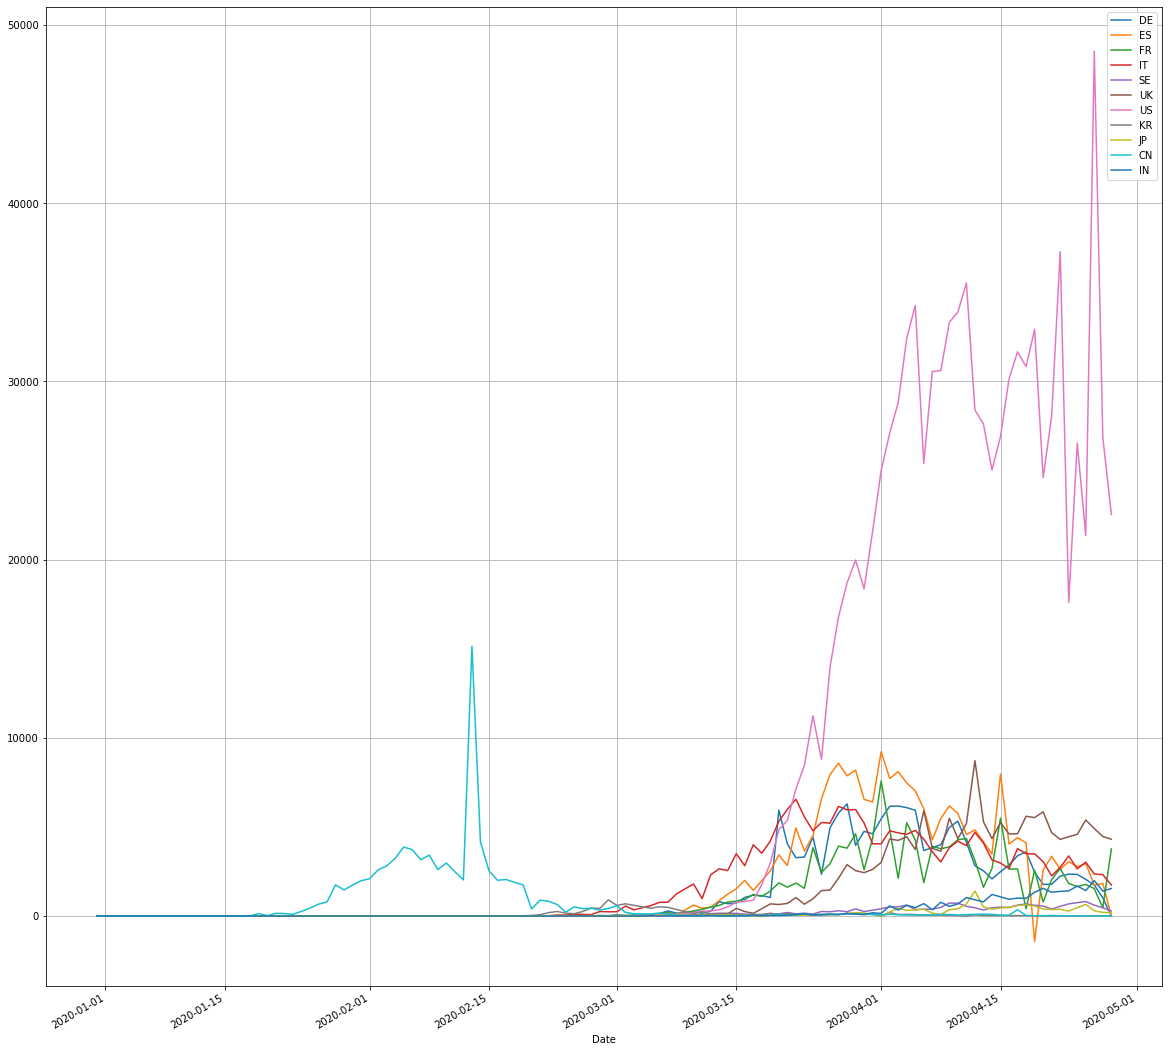

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

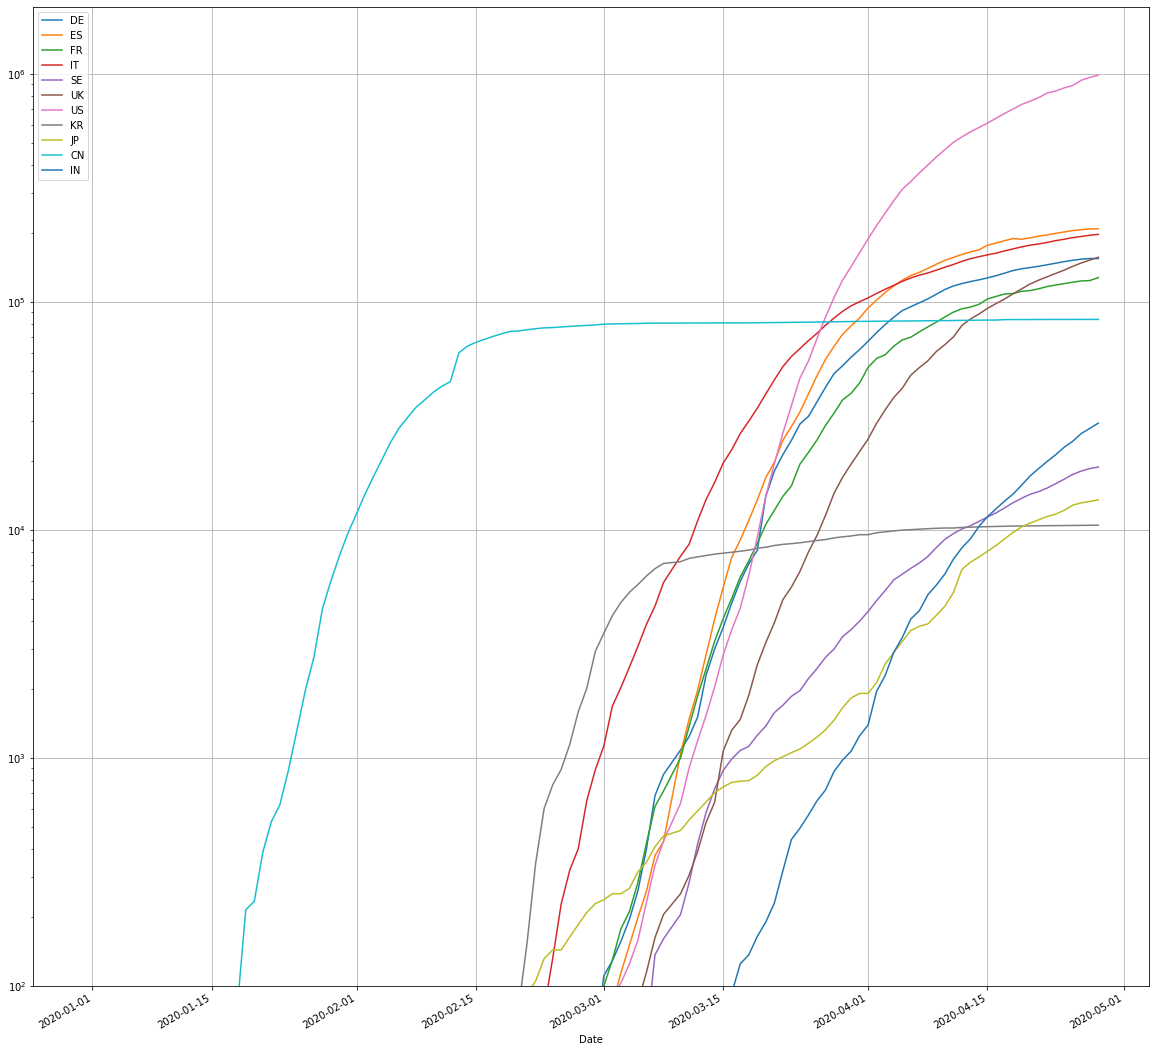

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

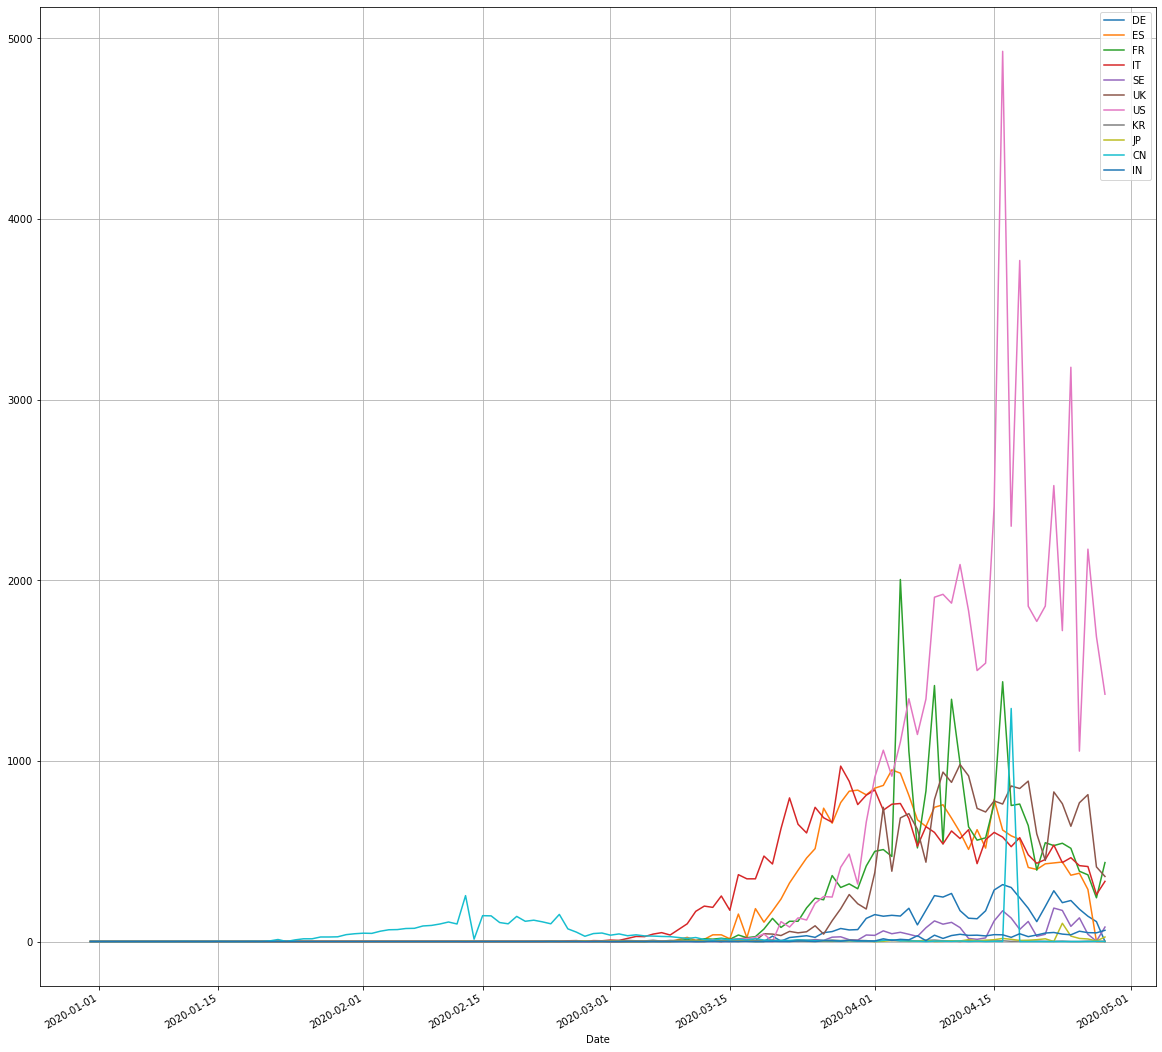

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

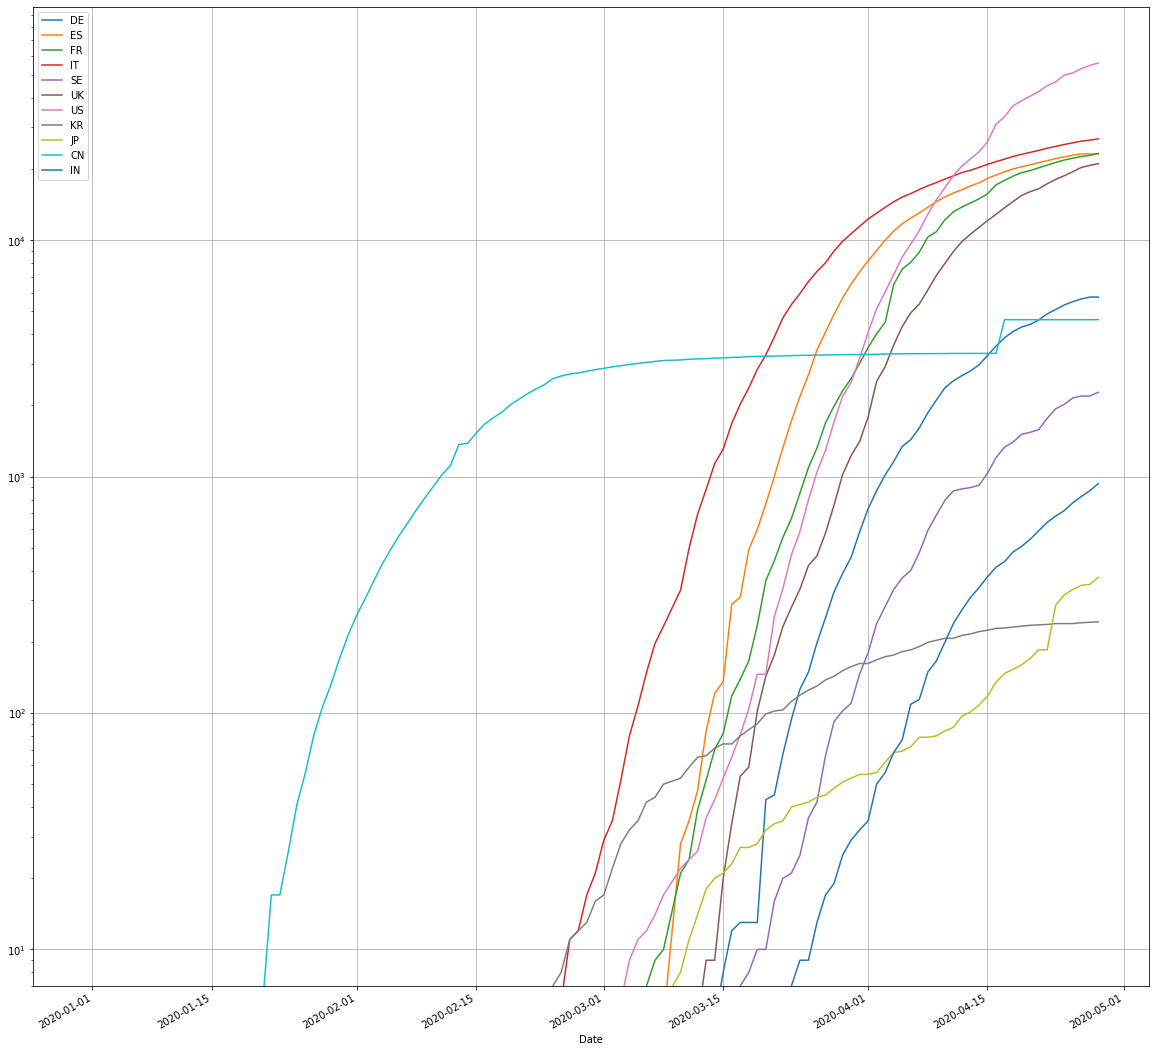

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-04-14,2082.0,3477.0,2673,3153,465,4342,25023,27,390,94,1211
12,2020-04-15,2486.0,7968.0,5497,2972,497,5252,26922,27,455,49,1075
11,2020-04-16,2866.0,4040.0,2633,2667,482,4603,30148,22,482,50,942
10,2020-04-17,3380.0,4400.0,2641,3786,613,4617,31667,22,585,352,1007
9,2020-04-18,3609.0,4104.0,405,3493,676,5599,30833,18,628,31,991
8,2020-04-19,2458.0,-1430.0,2569,3491,606,5525,32922,8,566,18,1334
7,2020-04-20,1775.0,2585.0,785,3047,563,5850,24601,13,390,14,1553
6,2020-04-21,1785.0,3352.0,2051,2256,392,4676,28065,9,367,32,1335
5,2020-04-22,2237.0,2627.0,2667,2729,545,4301,37289,11,378,15,1384
4,2020-04-23,2352.0,3052.0,1827,3370,682,4451,17588,8,276,12,1409


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-14,125043.0,169337.0,97666.0,158024.0,10906.0,88554.0,582473.0,10316.0,7612.0,83258.0,10363.0
2020-04-15,127529.0,177305.0,103163.0,160996.0,11403.0,93806.0,609395.0,10343.0,8067.0,83307.0,11438.0
2020-04-16,130395.0,181345.0,105796.0,163663.0,11885.0,98409.0,639543.0,10365.0,8549.0,83357.0,12380.0
2020-04-17,133775.0,185745.0,108437.0,167449.0,12498.0,103026.0,671210.0,10387.0,9134.0,83709.0,13387.0
2020-04-18,137384.0,189849.0,108842.0,170942.0,13174.0,108625.0,702043.0,10405.0,9762.0,83740.0,14378.0
2020-04-19,139842.0,188419.0,111411.0,174433.0,13780.0,114150.0,734965.0,10413.0,10328.0,83758.0,15712.0
2020-04-20,141617.0,191004.0,112196.0,177480.0,14343.0,120000.0,759566.0,10426.0,10718.0,83772.0,17265.0
2020-04-21,143402.0,194356.0,114247.0,179736.0,14735.0,124676.0,787631.0,10435.0,11085.0,83804.0,18600.0
2020-04-22,145639.0,196983.0,116914.0,182465.0,15280.0,128977.0,824920.0,10446.0,11463.0,83819.0,19984.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-04-14,170.0,517.0,574,564,20,717,1541,5,7,0,31
12,2020-04-15,285.0,787.0,762,604,114,778,2408,3,10,1,38
11,2020-04-16,315.0,617.0,1438,578,170,761,4928,4,17,0,37
10,2020-04-17,299.0,585.0,753,525,130,861,2299,1,12,1290,23
9,2020-04-18,242.0,565.0,761,575,67,847,3770,2,6,0,43
8,2020-04-19,184.0,410.0,642,480,111,888,1856,2,7,0,27
7,2020-04-20,110.0,399.0,395,433,29,596,1772,2,10,0,36
6,2020-04-21,194.0,430.0,547,454,40,449,1857,1,15,0,47
5,2020-04-22,281.0,435.0,531,534,185,828,2524,1,0,0,50
4,2020-04-23,215.0,440.0,544,437,172,763,1721,2,101,0,41


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-04-14,2969.0,17489.0,14958.0,20332.0,919.0,11328.0,23645.0,221.0,108.0,3322.0,339.0
2020-04-15,3254.0,18276.0,15720.0,20936.0,1033.0,12106.0,26053.0,224.0,118.0,3323.0,377.0
2020-04-16,3569.0,18893.0,17158.0,21514.0,1203.0,12867.0,30981.0,228.0,135.0,3323.0,414.0
2020-04-17,3868.0,19478.0,17911.0,22039.0,1333.0,13728.0,33280.0,229.0,147.0,4613.0,437.0
2020-04-18,4110.0,20043.0,18672.0,22614.0,1400.0,14575.0,37050.0,231.0,153.0,4613.0,480.0
2020-04-19,4294.0,20453.0,19314.0,23094.0,1511.0,15463.0,38906.0,233.0,160.0,4613.0,507.0
2020-04-20,4404.0,20852.0,19709.0,23527.0,1540.0,16059.0,40678.0,235.0,170.0,4613.0,543.0
2020-04-21,4598.0,21282.0,20256.0,23981.0,1580.0,16508.0,42535.0,236.0,185.0,4613.0,590.0
2020-04-22,4879.0,21717.0,20787.0,24515.0,1765.0,17336.0,45059.0,237.0,185.0,4613.0,640.0
